In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.font_manager as fm
import copy
from networkx.algorithms import community
import matplotlib.animation as animation
import random 

In [12]:
data = pd.read_csv( "networkx_final.csv")
g = nx.DiGraph()


# 노드 4개 , edge는 


In [13]:
function = list(data['function'].unique())
element_name = list(data['element_name'].unique())
eng_name = list(data['eng_name'].unique())
prod_nm = list(data['prod_nm'].unique())

# 1. 데이터 list화 시키기

In [14]:
# 2. layout 셋팅
layout = {}

for f in function : 
    layout[f] = np.array([random.uniform(0,0.1), random.uniform(0.2,0.8)])
for e in element_name :
    layout[e] = np.array([random.uniform( 0.2 , 0.4 ), random.uniform(0.2 , 0.8)])
for k in eng_name :
    layout[k] = np.array([random.uniform( 0.45 ,0.65), random.uniform(0.2 , 0.8)])
for p in prod_nm :
    layout[p] = np.array([random.uniform(0.7,1), random.uniform(0.1, 0.9)])

# 2. label 셋팅 
label = {}

for f in function : 
    label[f] = f
for e in element_name :
    label[e] = e
for k in eng_name :
    label[k] = k
for p in prod_nm :
    label[p] = p

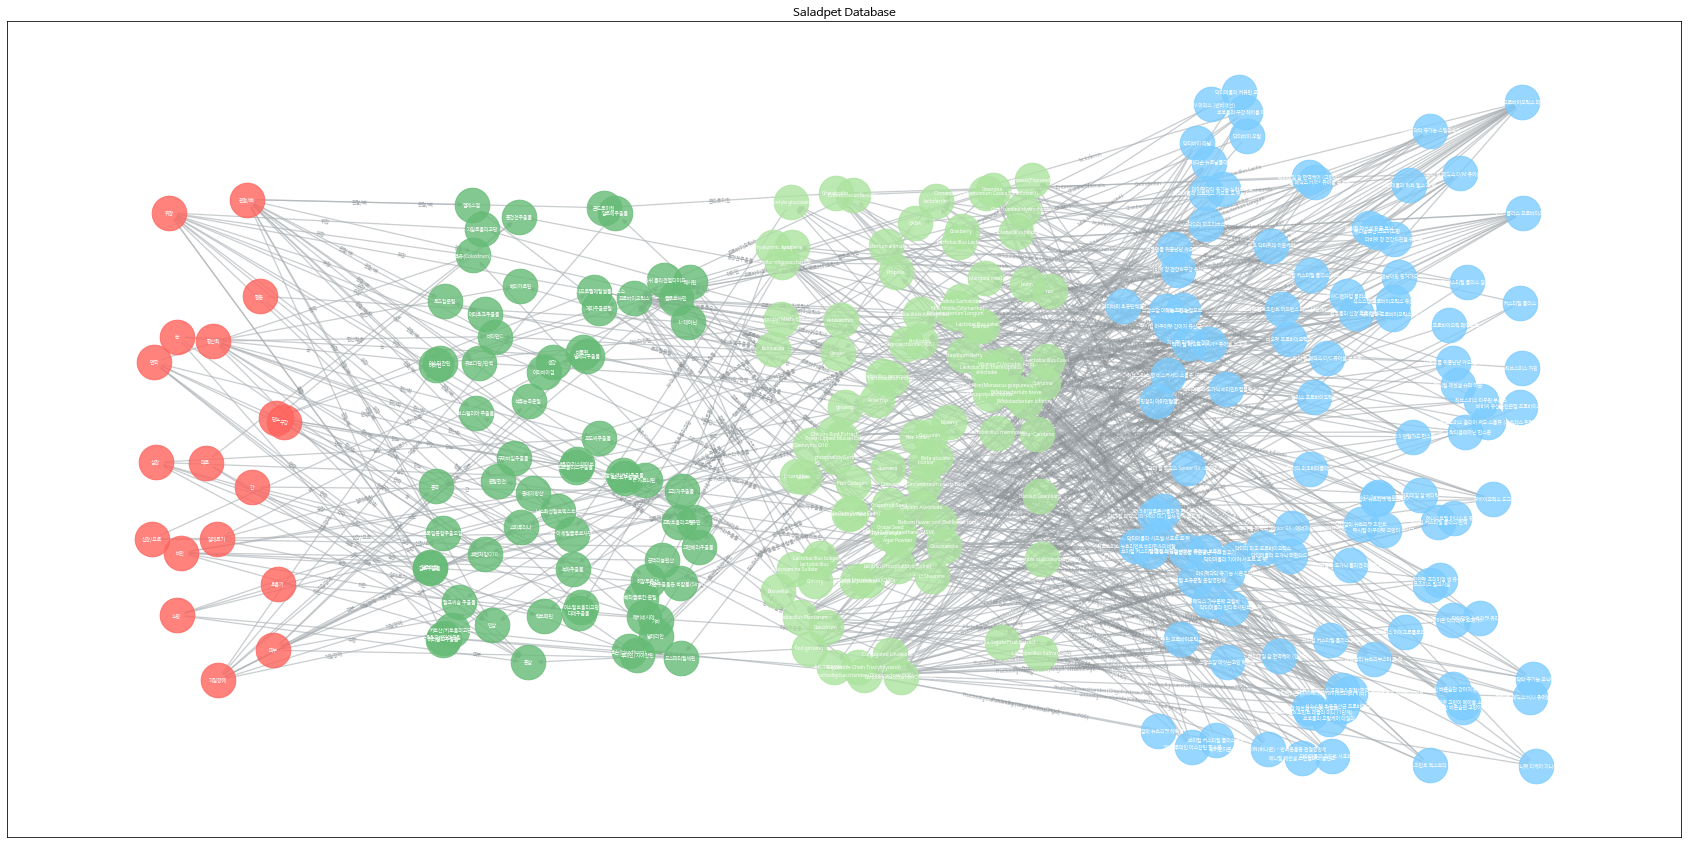

In [35]:
plt.figure(figsize = (30,15))
# plt.savefig('fig_final.png', dpi = 300)

# 3. 노드 생성
nx.draw_networkx_nodes(g, layout, nodelist = function, node_size = 1200, node_color = '#FF635D', alpha = 0.8).set_edgecolor('#FF635D')
nx.draw_networkx_nodes(g, layout, nodelist = eng_name, node_size = 1200, node_color = '#ACE39F', alpha = 0.8).set_edgecolor('#ACE39F')
nx.draw_networkx_nodes(g, layout, nodelist = element_name, node_size = 1200, node_color = '#66BB76', alpha =  0.8).set_edgecolor('#66BB76')
nx.draw_networkx_nodes(g, layout, nodelist = prod_nm, node_size = 1200, node_color = '#7CCCFF', alpha = 0.8 ).set_edgecolor('#7CCCFF')

edges = []
edges_pre = []
for index in range (len(data)):
    p_k = (data['prod_nm'][index], data['eng_name'][index])
    p_k_label = data['eng_name'][index]
    k_e = (data['eng_name'][index], data['element_name'][index])
    k_e_label = data['element_name'][index]
    e_f = (data['function'][index], data['element_name'][index])
    e_f_label = data['function'][index]
    edges.append(p_k)
    edges.append(k_e)
    edges.append(e_f)
    edges_pre.append(p_k_label)
    edges_pre.append(k_e_label)
    edges_pre.append(e_f_label)

edge_label = dict(zip(edges, edges_pre))
g.add_edges_from(edges)


# 4. 엣지 생성
nx.draw_networkx_edges(g, layout , edge_color = '#A8AEB2', alpha = 0.6, width = 1.3, label = edge_label)

nx.draw_networkx_labels (g, layout, labels = label, font_size = 5, font_color = 'white', font_family = "NanumBarunGothic")

nx.draw_networkx_edge_labels( g, layout, edge_labels= edge_label , label_pos=0.5, font_size= 5 , font_color='#868C90', font_family='NanumBarunGothic', alpha= 0.8 , bbox= dict(alpha=0) , horizontalalignment='center', verticalalignment='center', ax=None, rotate=True, clip_on=False)

plt.rc('font', family = 'NanumBarunGothic')
plt.title ('Saladpet Database')
plt.savefig('fig_final.png', dpi = 300)

[]

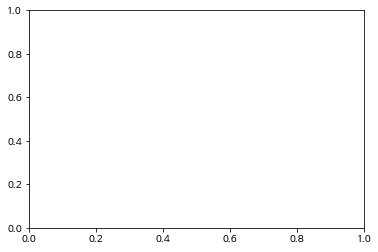

In [33]:

p = nx.draw_networkx_edges(g, layout , edge_color = '#CDD2D5', alpha = 0.8, width = 0.3)
p

In [21]:
edge_label

{('펫턴 프로바이오틱스', 'Inulin'): 'l',
 ('Inulin', '이눌린/치커리추출물'): 'i',
 ('지질장애', '이눌린/치커리추출물'): 'e',
 ('당뇨', '이눌린/치커리추출물'): 'a'}